In [1]:
!pip install tensorflow==2.16.1



In [2]:
import tensorflow as tf
print(tf.__version__)

2024-12-20 15:22:41.800314: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 15:22:41.831016: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


In [3]:
%pip install numpy
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
directory_train = r'Ubuntu\home\arsenal\ml\OCT2017\trainOCT2017\train'  # Path to the dataset directory
directory_test = r'Ubuntu\home\arsenal\ml\OCT2017\trainOCT2017\test'
print(directory_train )

Ubuntu\home\arsenal\ml\OCT2017\trainOCT2017\train


In [5]:
import os
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Step 1: Load the Dataset
directory_train = r'/home/arsenal/ml/OCT2017/train'  # Path to the dataset directory
directory_test = r'/home/arsenal/ml/OCT2017/test'
directory_val = r'/home/arsenal/ml/OCT2017/val'

# Supported image formats
supported_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

# Filter out unsupported image formats
for root, dirs, files in os.walk(directory_train):
    for file in files:
        if not file.lower().endswith(supported_formats):
            os.remove(os.path.join(root, file))


for root, dirs, files in os.walk(directory_test):
    for file in files:
        if not file.lower().endswith(supported_formats):
            os.remove(os.path.join(root, file))
            
            
            
# Load the dataset
dataset_train = image_dataset_from_directory(
    directory_train,
    image_size=(256, 256),  # Adjust the size as needed
    batch_size=64,
    label_mode='int'  # Use 'int' for integer labels, 'categorical' for one-hot encoded labels
)

dataset_test = image_dataset_from_directory(
    directory_test,
    image_size=(256, 256),  # Adjust the size as needed
    batch_size=64,
    label_mode='int'  # Use 'int' for integer labels, 'categorical' for one-hot encoded labels
)

dataset_val = image_dataset_from_directory(
    directory_val,
    image_size=(256, 256),  # Adjust the size as needed
    batch_size=64,
    label_mode='int'  # Use 'int' for integer labels, 'categorical' for one-hot encoded labels
)

# Split the dataset into training and validation sets
train_size = int(len(dataset_train))
val_size = len(dataset_test)
train_dataset = dataset_train.take(train_size)
val_dataset = dataset_test.skip(val_size)




# Step 2: Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Adjust the number of units to match the number of classes
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tensorboard_callback = keras.callbacks.TensorBoard('assets/logs/base_model')


Found 83489 files belonging to 4 classes.


2024-12-20 15:22:46.838804: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:22:46.849503: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:22:46.849549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:22:46.855315: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:22:46.855344: I external/local_xla/xla/stream_executor

Found 968 files belonging to 4 classes.
Found 32 files belonging to 4 classes.


/home/arsenal/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:

# Step 4: Train the Model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset,callbacks=[tensorboard_callback])

Epoch 1/10


I0000 00:00:1734708168.832022    3670 service.cc:145] XLA service 0x7f2f1c007310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734708168.832069    3670 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-20 15:22:48.908759: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-20 15:22:49.225662: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-12-20 15:23:03.963580: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng1{k2=6,k3=0} for conv (f32[128,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,62,62]{3,2,1,0}, f32[64,128,60,60]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_opera

   1/1305 ━━━━━━━━━━━━━━━━━━━━ 3:53:40 11s/step - accuracy: 0.2812 - loss: 7.4999

I0000 00:00:1734708179.043224    3670 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1284/1305 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.6131 - loss: 8.2012

2024-12-20 15:25:19.101677: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng56{k2=0,k13=2,k14=3} for conv (f32[33,32,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[33,64,125,125]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-20 15:25:19.104123: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 5.432233924s
Trying algorithm eng56{k2=0,k13=2,k14=3} for conv (f32[33,32,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[33,64,125,125]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"c

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 148s 105ms/step - accuracy: 0.6151 - loss: 8.0947
Epoch 2/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ 2:54 134ms/step - accuracy: 0.8906 - loss: 0.3101

2024-12-20 15:25:16.494283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:25:16.494330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:25:16.494347: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:25:16.494369: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
/home/arsenal/miniconda3/envs/tf/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  sel

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 130s 100ms/step - accuracy: 0.8572 - loss: 0.3987
Epoch 3/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ 3:00 138ms/step - accuracy: 0.9219 - loss: 0.2387

2024-12-20 15:27:26.408122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:27:26.408168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:27:26.408184: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:27:26.408208: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
2024-12-20 15:27:26.450658: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the 

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 128s 98ms/step - accuracy: 0.9001 - loss: 0.2818
Epoch 4/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ 2:53 133ms/step - accuracy: 0.9531 - loss: 0.1483

2024-12-20 15:29:33.997462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:29:33.997511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:29:33.997523: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:29:33.997552: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
2024-12-20 15:29:34.032321: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the 

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 128s 98ms/step - accuracy: 0.9292 - loss: 0.2041
Epoch 5/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ 2:57 136ms/step - accuracy: 0.9844 - loss: 0.0622

2024-12-20 15:31:41.577430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:31:41.577472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:31:41.577481: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:31:41.577505: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
2024-12-20 15:31:41.612308: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the 

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 132s 101ms/step - accuracy: 0.9462 - loss: 0.1558
Epoch 6/10


2024-12-20 15:33:53.181941: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-12-20 15:33:53.303660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:33:53.303701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:33:53.303713: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:33:53.303737: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancell

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 137s 105ms/step - accuracy: 0.9575 - loss: 0.1230
Epoch 7/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ -7486s -5740913us/step - accuracy: 0.9844 - loss: 0.0513

2024-12-20 15:36:09.939086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:36:09.939161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:36:09.939181: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:36:09.939220: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
2024-12-20 15:36:10.000499: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the 

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 120s 96ms/step - accuracy: 0.9669 - loss: 0.1003
Epoch 8/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ 2:54 134ms/step - accuracy: 0.9688 - loss: 0.0462

2024-12-20 15:38:09.749877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:38:09.749921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:38:09.749931: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:38:09.749957: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
2024-12-20 15:38:09.783933: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the 

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 128s 98ms/step - accuracy: 0.9703 - loss: 0.0912
Epoch 9/10
   1/1305 ━━━━━━━━━━━━━━━━━━━━ 3:12 148ms/step - accuracy: 0.9844 - loss: 0.0994

2024-12-20 15:40:18.122811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:40:18.122879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:40:18.122898: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:40:18.122927: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2756422225730610947
2024-12-20 15:40:18.188864: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the 

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 127s 97ms/step - accuracy: 0.9746 - loss: 0.0790
Epoch 10/10


2024-12-20 15:42:24.959506: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-12-20 15:42:25.114613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:42:25.114658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:42:25.114679: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:42:25.114703: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancell

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 127s 97ms/step - accuracy: 0.9796 - loss: 0.0625


2024-12-20 15:44:31.692785: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67109120 bytes after encountering the first element of size 67109120 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-12-20 15:44:31.818842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-20 15:44:31.818891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-12-20 15:44:31.818902: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12732693919242168725
2024-12-20 15:44:31.818926: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancell

In [8]:
val_loss, val_accuracy = model.evaluate(dataset_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9375 - loss: 0.1765
Validation Loss: 0.17649129033088684, Validation Accuracy: 0.9375


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,518,865 (169.83 MB)

 Trainable params: 14,839,621 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,679,244 (113.22 MB)

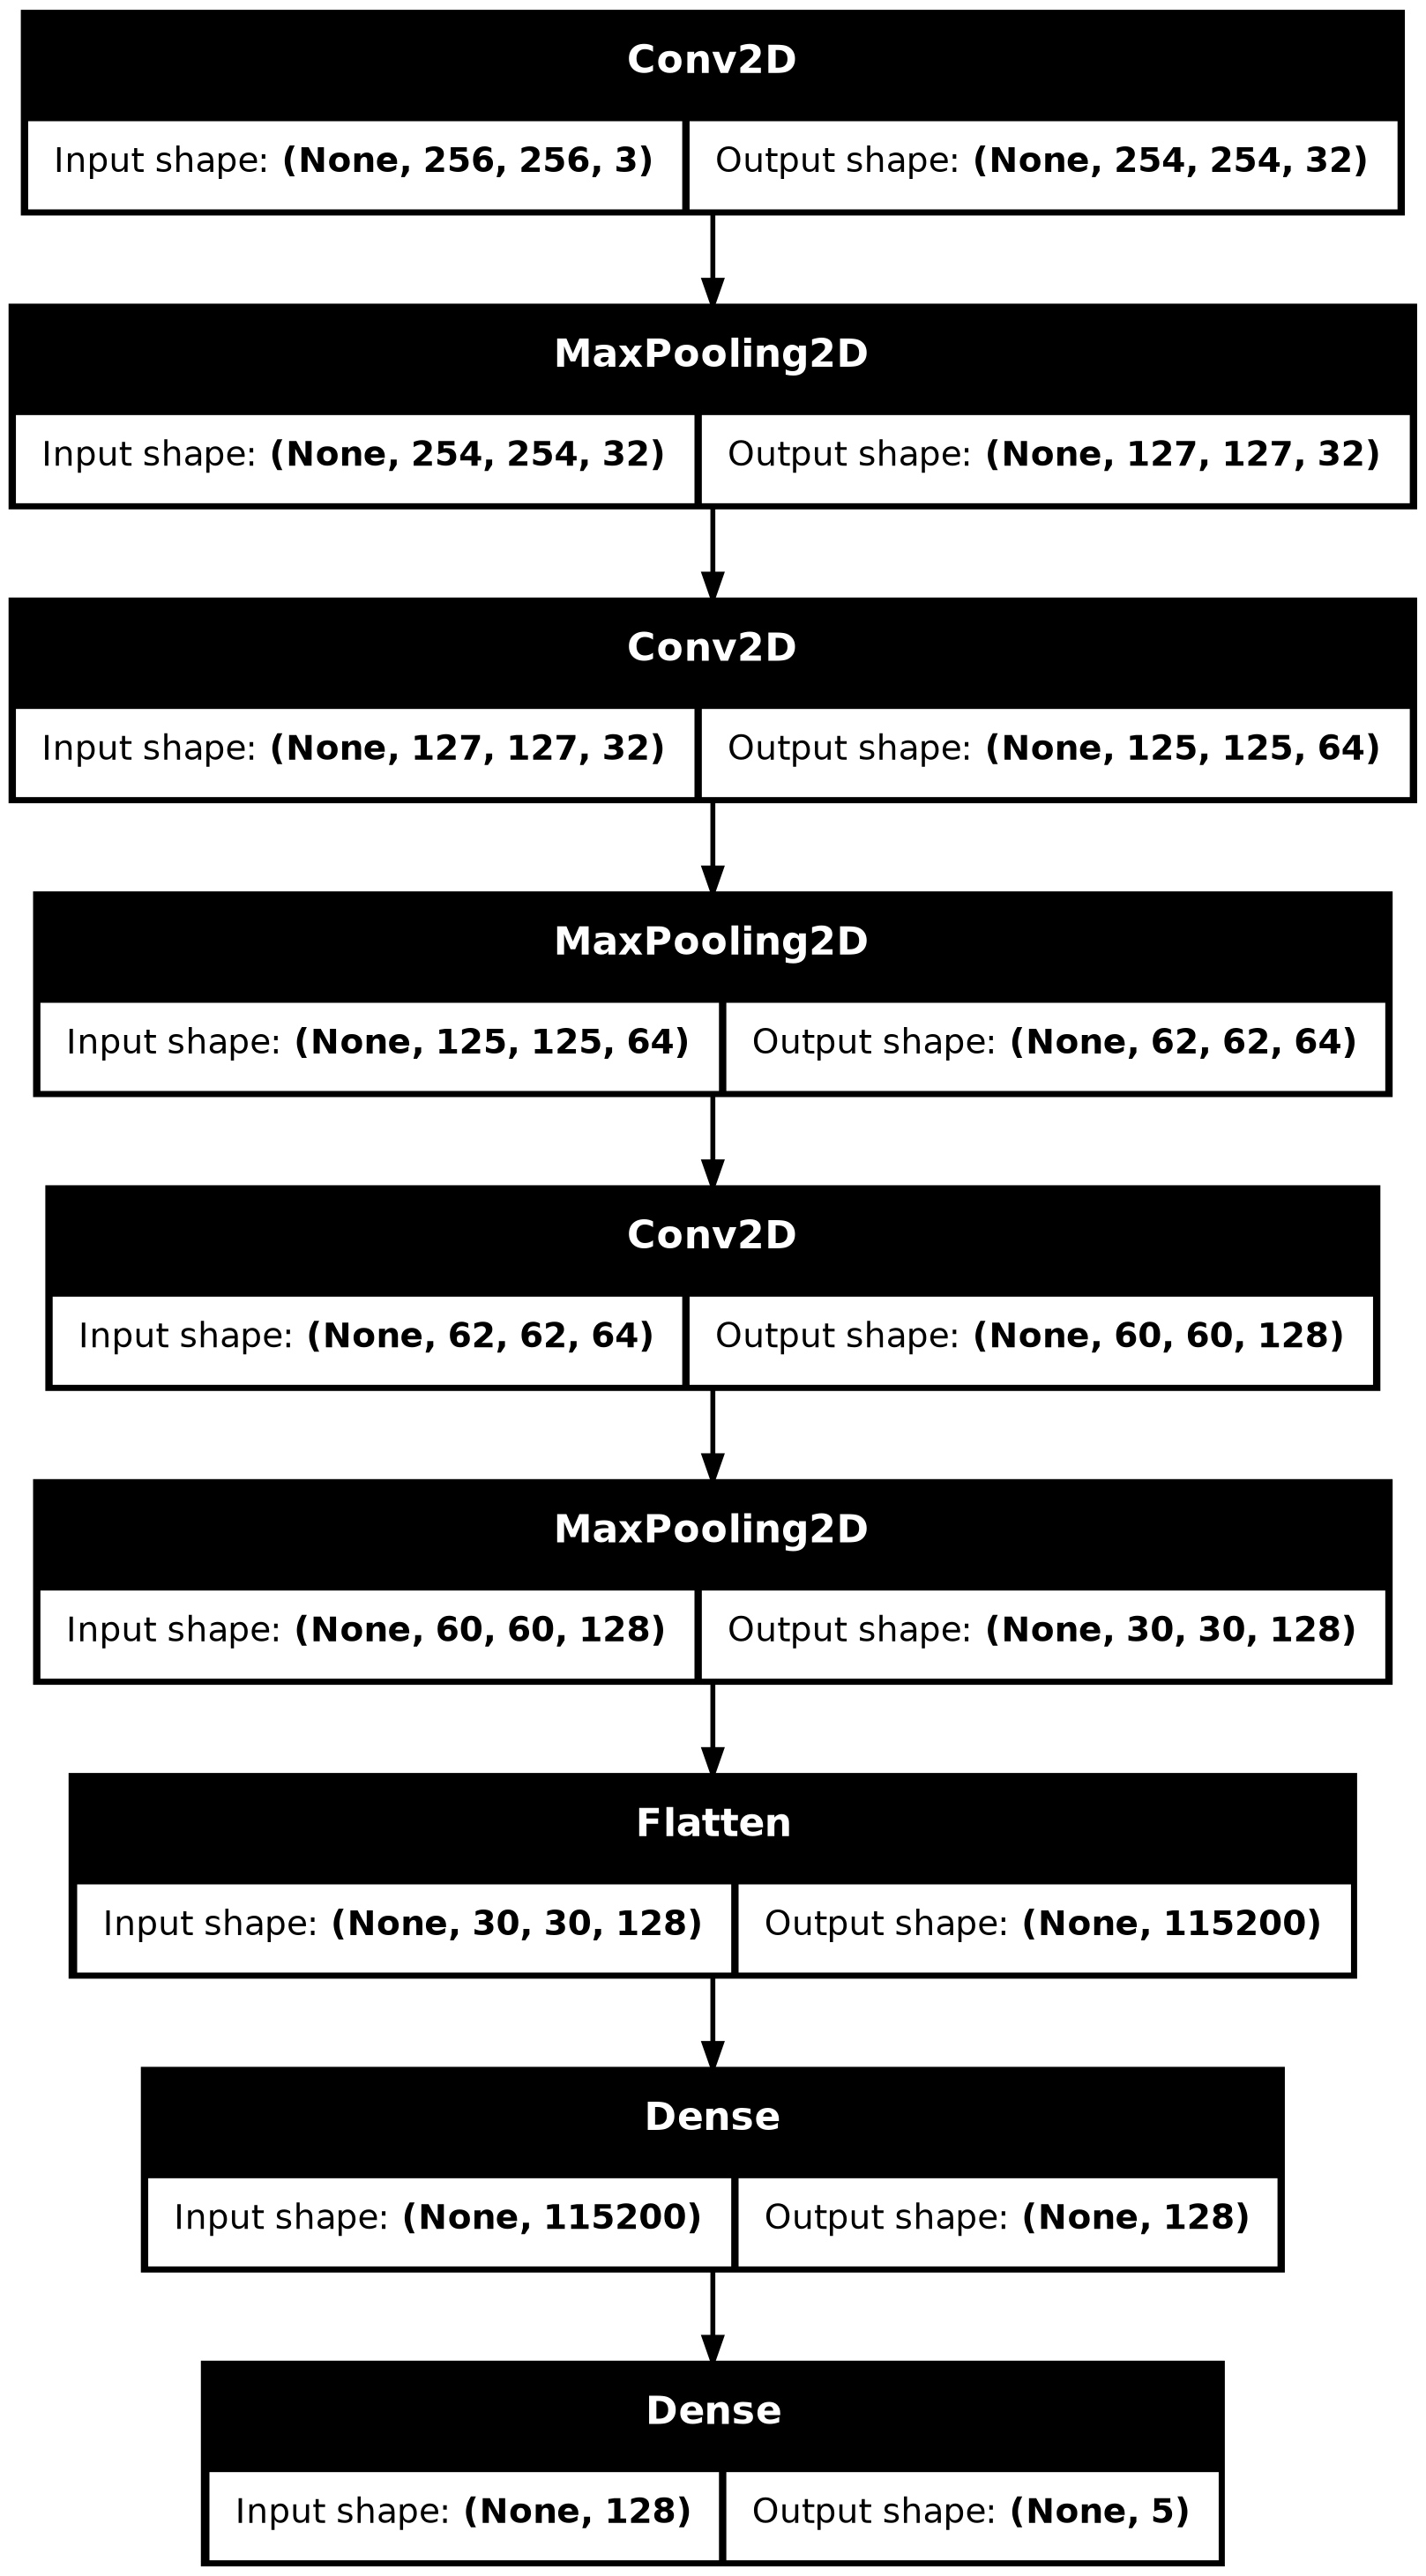

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'base1.png',show_shapes=True)

In [43]:
'''import matplotlib.pyplot as plt

def plot_loss_curve(history):
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
    #plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Model Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)

    plt.figure(figsize=(14, 5))
    

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'b-', label='Training Loss')
    #plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Model Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()'''


"import matplotlib.pyplot as plt\n\ndef plot_loss_curve(history):\n    plt.figure(figsize=(14, 5))\n\n    # Plot training & validation accuracy values\n    plt.subplot(1, 2, 1)\n    plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')\n    #plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')\n    plt.title('Model Accuracy', fontsize=14)\n    plt.xlabel('Epoch', fontsize=12)\n    plt.ylabel('Accuracy', fontsize=12)\n    plt.legend(loc='upper left', fontsize=12)\n    plt.grid(True)\n\n    plt.figure(figsize=(14, 5))\n    \n\n    # Plot training & validation loss values\n    plt.subplot(1, 2, 2)\n    plt.plot(history.history['loss'], 'b-', label='Training Loss')\n    #plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')\n    plt.title('Model Loss', fontsize=14)\n    plt.xlabel('Epoch', fontsize=12)\n    plt.ylabel('Loss', fontsize=12)\n    plt.legend(loc='upper left', fontsize=12)\n    plt.grid(True)\n\n    plt.tight_layout()\n   

In [10]:
import matplotlib.pyplot as plt

def plot_loss_curve(history, filename='loss_accuracy_plot.png'):
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
    #plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Model Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'b-', label='Training Loss')
    #plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Model Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)

    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig(filename)

    plt.show()


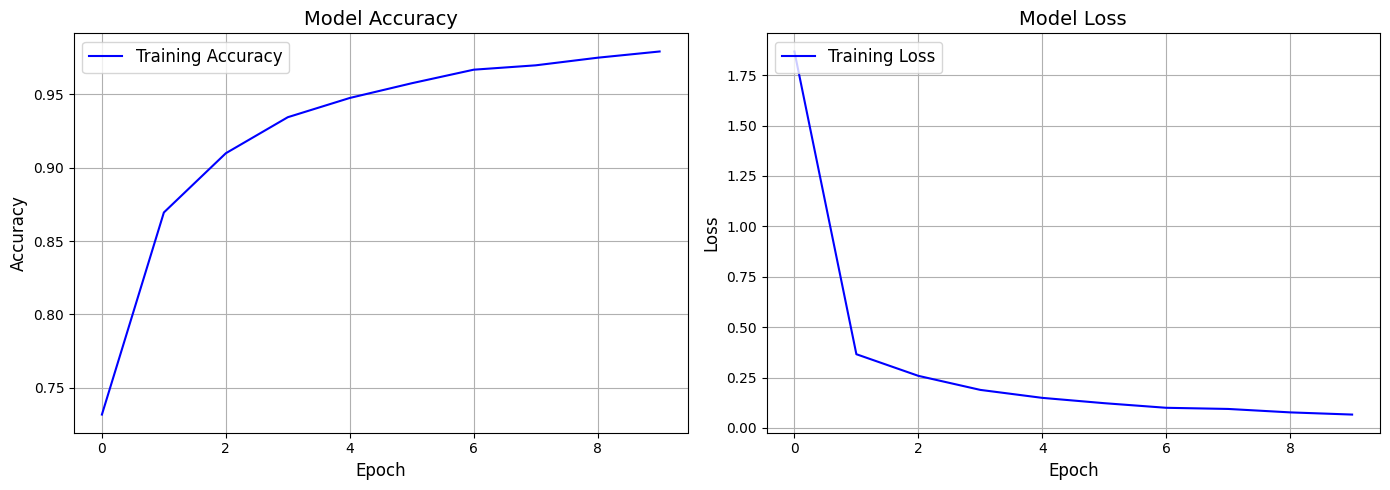

In [11]:
plot_loss_curve(history, 'training_history.png')

In [12]:
%load_ext tensorboard

In [13]:
%tensorboard --logdir=assets/logs/base_model

In [16]:
import pandas as pd
history_df = pd.DataFrame(history.history)

# Save the DataFrame to a CSV file
history_df.to_csv('training_history_base_model.csv', index=False)


log_dir='assets/logs/base_model/'
# Manually log additional metrics to TensorBoard
with tf.summary.create_file_writer(log_dir).as_default():
    for epoch, metrics in enumerate(history.history['accuracy']):
        tf.summary.scalar('accuracy', metrics, step=epoch)
    for epoch, metrics in enumerate(history.history['val_accuracy']):
        tf.summary.scalar('val_accuracy', metrics, step=epoch)
    for epoch, metrics in enumerate(history.history['loss']):
        tf.summary.scalar('loss', metrics, step=epoch)
    for epoch, metrics in enumerate(history.history['val_loss']):
        tf.summary.scalar('val_loss', metrics, step=epoch)

KeyError: 'val_accuracy'